<a href="https://colab.research.google.com/github/erikhhs/ads/blob/main/ML_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welke soort pinguin is dit?


## Importeren toolset
- De tools die we gebruiken moeten we eerst importeren voordat we ze kunnen gebruiken.

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn import tree as tree_plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

## 1 Laden van de penguins data set
- 6 kolommen met kenmerken van de pinguin
- 1 kolom waarin de soort (species) pinguin staat 

In [24]:
df=sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 1.1 Data
- We hebben te maken met twee soorten data, welke soorten zijn dat?
- Er ontbreekt ook data in sommige kolommen. Welke kolommen zijn dat

In [ ]:
#numeriek en labels / klassen

- In onderstaande cel verwijderen we alle regels waar NaN in staat.

In [28]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## 2.1 Analyse: aantal per soort

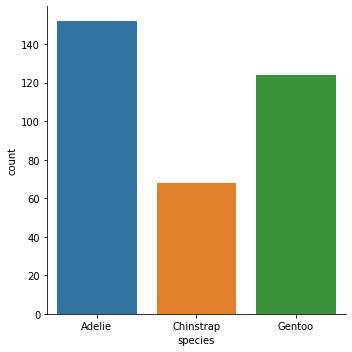

In [6]:
sns.catplot(kind = 'count', x = 'species', data=df)

## 2.2 Impact van numerieke kenmerken op soort

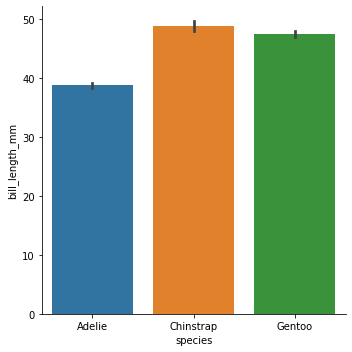

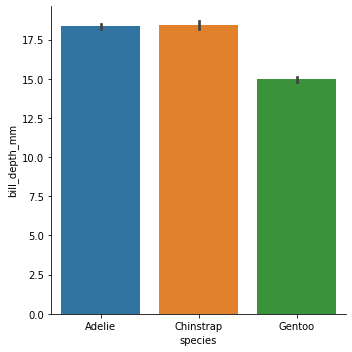

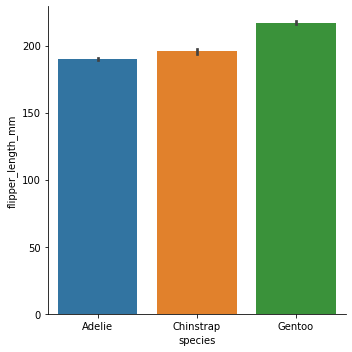

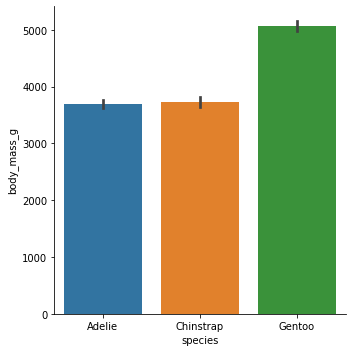

In [7]:
sns.catplot(kind = 'bar', x = 'species', y = 'bill_length_mm', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'bill_depth_mm', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'flipper_length_mm', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'body_mass_g', data=df)

## 2.3 Analyse niet-numerieke kenmerken

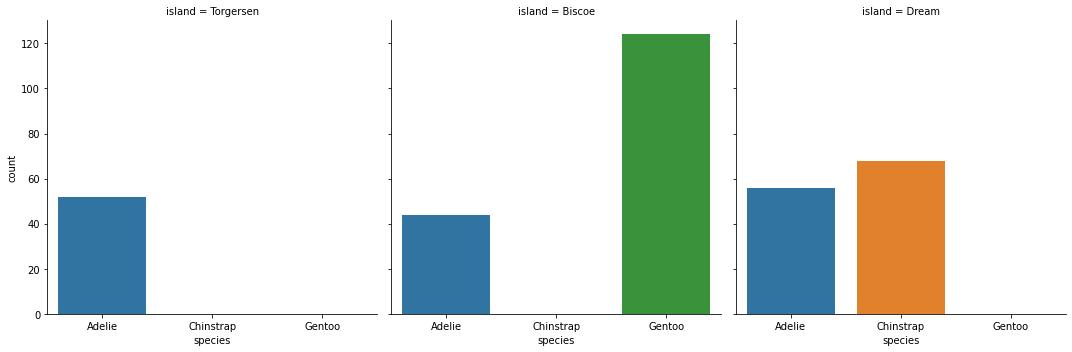

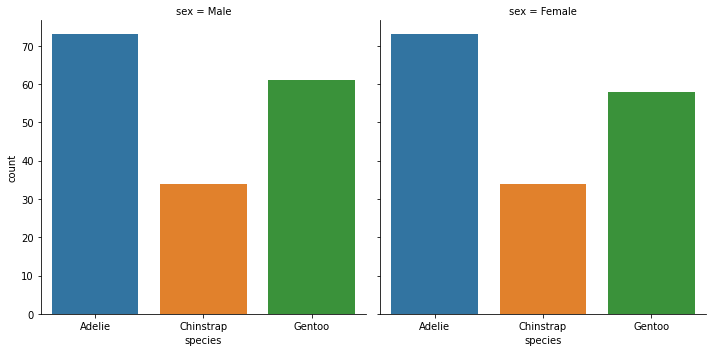

In [8]:
sns.catplot(kind = 'count', x = 'species', col = 'island', data=df)
sns.catplot(kind = 'count', x = 'species', col = 'sex', data=df)

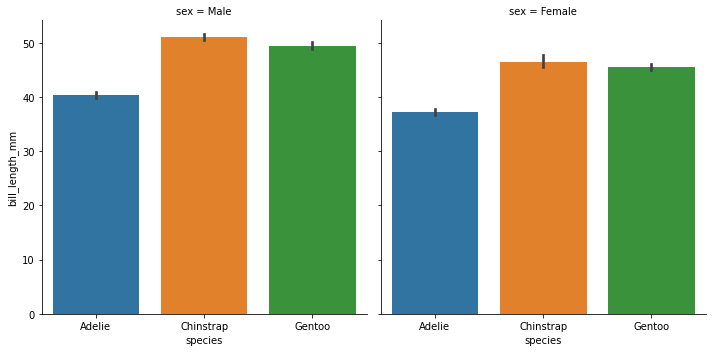

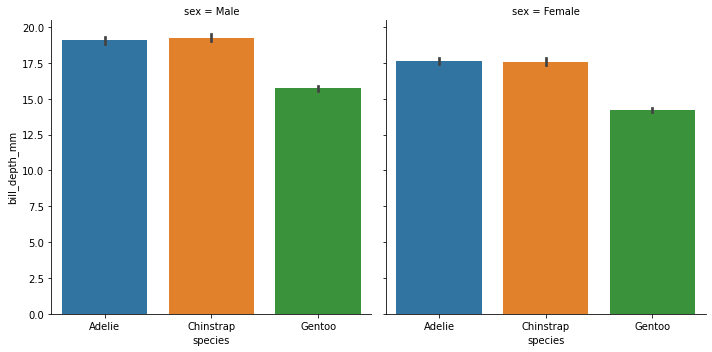

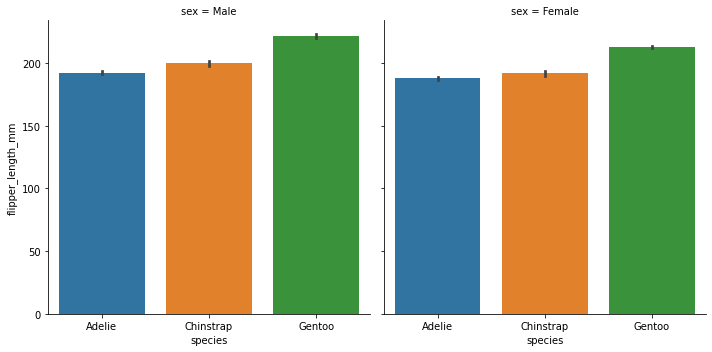

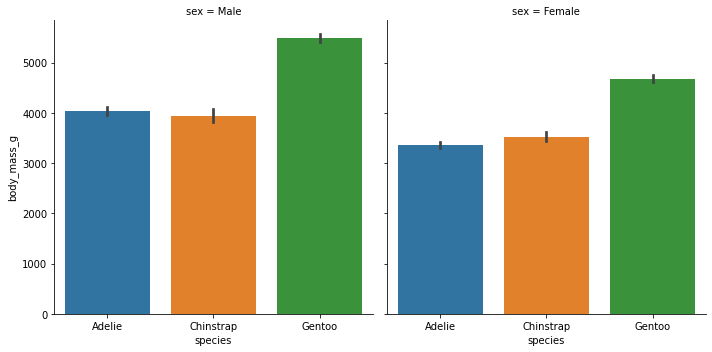

In [9]:
sns.catplot(kind = 'bar', x = 'species', y = 'bill_length_mm', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'bill_depth_mm', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'flipper_length_mm', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'body_mass_g', col = 'sex', data=df)

### verdelingen

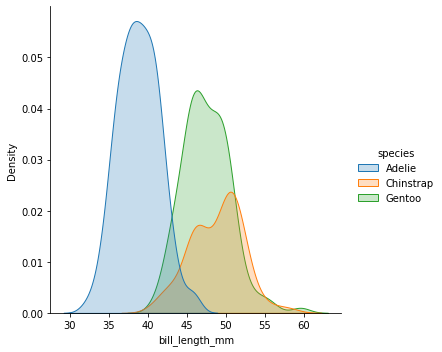

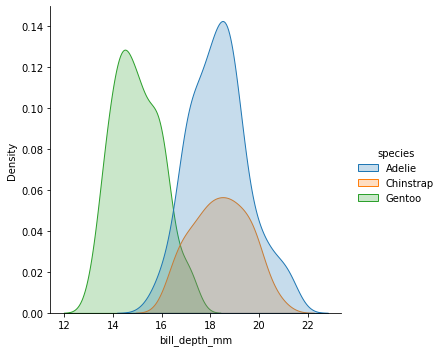

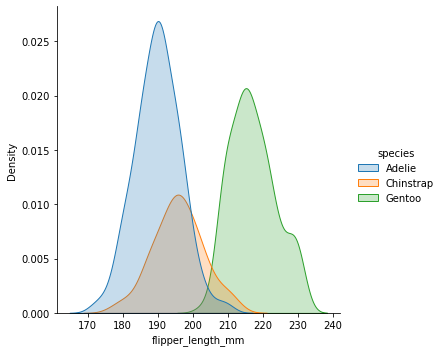

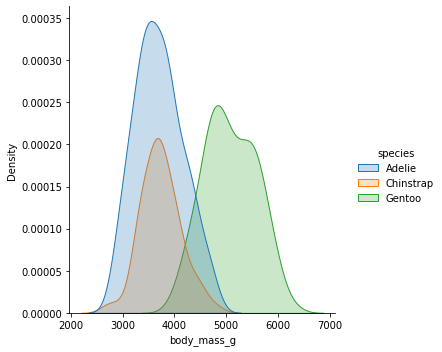

In [10]:
sns.displot(df, x='bill_length_mm', hue="species", kind="kde", fill=True)
sns.displot(df, x='bill_depth_mm', hue="species", kind="kde", fill=True)
sns.displot(df, x='flipper_length_mm', hue="species", kind="kde", fill=True)
sns.displot(df, x='body_mass_g', hue="species", kind="kde", fill=True)

### Omzetten naar numeriek

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_num'] = le.fit_transform(df['species'])
df = df.dropna()
names = list(le.classes_)
df_dum = pd.get_dummies(df, columns=['island', 'sex'])
df_dum

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_num,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,2,1,0,0,1,0
340,Gentoo,46.8,14.3,215.0,4850.0,2,1,0,0,1,0
341,Gentoo,50.4,15.7,222.0,5750.0,2,1,0,0,0,1
342,Gentoo,45.2,14.8,212.0,5200.0,2,1,0,0,1,0


## Splitsen in x-variabelen en y-variabele

- Met de x-variabelen proberen we de y-variabele zo goed mogelijk te voorspellen.
- X-variabelen: de kenmerken van de tumor (mean radius, mean texture etc.).
- y-variabele: de klasse die we willen voorspellen. In dit geval kwaadaardig of goedaardig, 0 of 1.

In [31]:
X = df_dum.drop(['species','species_num'], axis=1)
y = df_dum['species_num']

## Splitsen in training data en test data
- De training data gebruiken we om het model te trainen
- De test data gebruiken we om te bepalen hoe goed ons model kan voorspellen

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
print('X_train:', 'Aantal rijen =' ,X_train.shape[0], ',','Aantal kolommen =', X_train.shape[1], )
print('y_train: ', 'Aantal rijen =', y_train.shape[0], ',','Aantal kolommen =', 1 )
print('X_test:', 'Aantal rijen =' ,X_test.shape[0], ',','Aantal kolommen =', X_test.shape[1], )
print('y_test: ', 'Aantal rijen =', y_test.shape[0], ',','Aantal kolommen =', 1 )


X_train: Aantal rijen = 249 , Aantal kolommen = 9
y_train:  Aantal rijen = 249 , Aantal kolommen = 1
X_test: Aantal rijen = 84 , Aantal kolommen = 9
y_test:  Aantal rijen = 84 , Aantal kolommen = 1


## Trainen van het model
- In dit geval maken we een beslisboom (decision tree)

In [33]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Visualisatie van het model
- Voor de eerste "split" wordt "mean concave points" gebruikt. Alle rijen (patienten) die een "mean concave points" hebben die lager is dan 0.051 worden toegekend aan de klasse goedaardig (benign). Dit is het blok linksonder het bovenste blok. Voorafgaand aan deze split hadden we 426 "samples" oftewel rontgenfoto's. Van deze foto's waren er 158 daadwerkelijk kwaadaardig en 268 goedaardig. De gini score geeft aan hoe "waardevol" de splitsing is. Hoe hoger, hoe beter.
- Het resultaat is dat er 267 foto's (samples) naar het linker blok gaan en 159 naar het rechter blok. 
- Het rechterblok wordt vervolgens gesplits op "worst texture".
- De beslisboom gaat net zolang door met splitsen totdat in de de onderste rij blokken alles goed is voorspeld

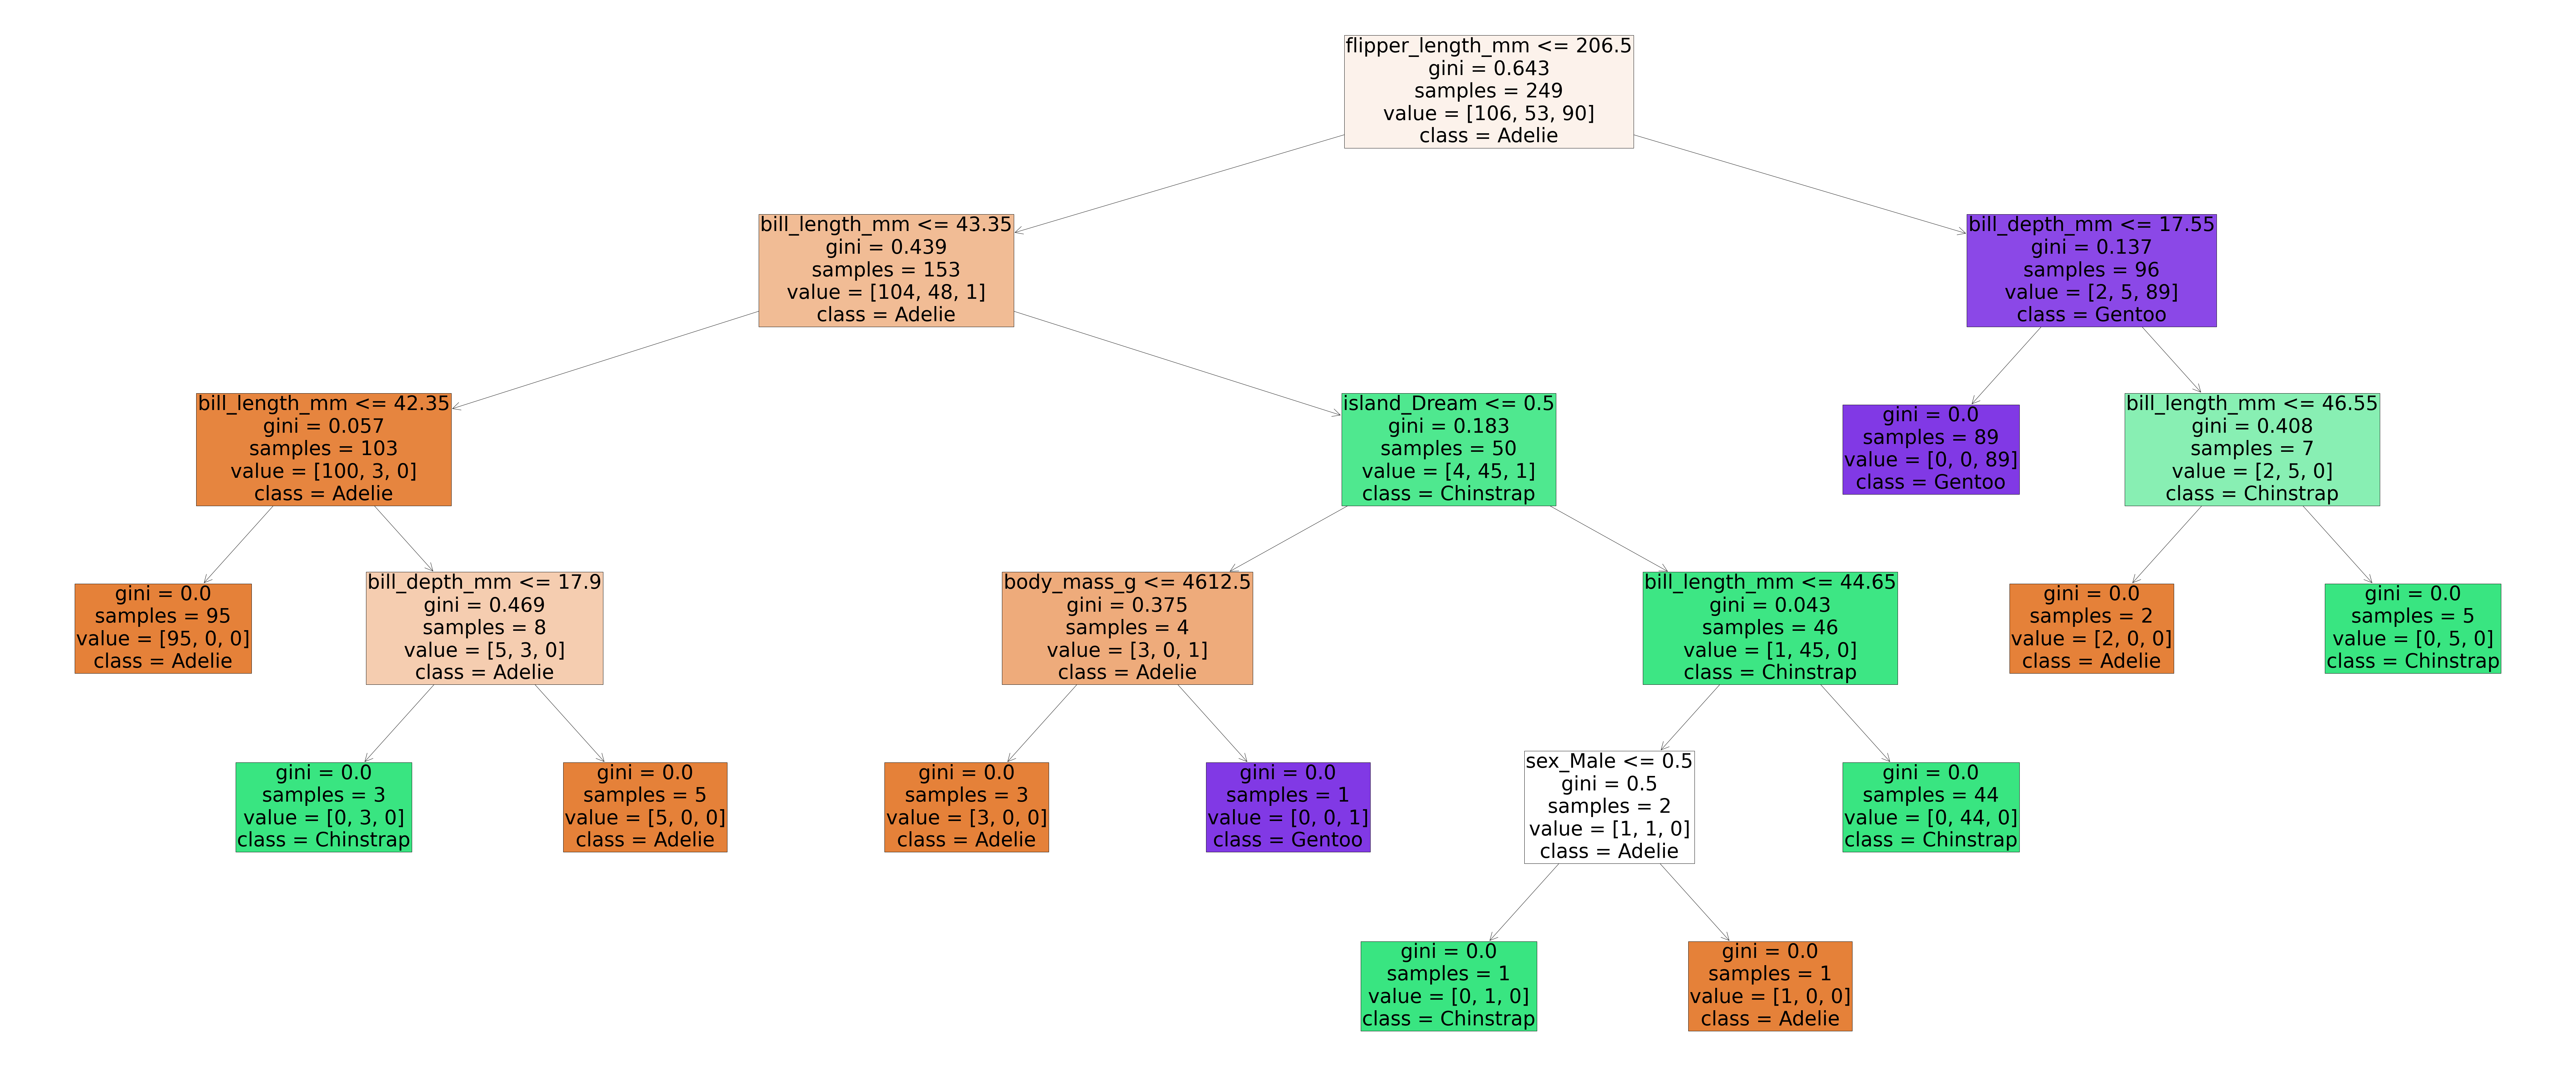

In [34]:
fig = plt.figure(figsize=(140,60))
_ = tree_plt.plot_tree(tree, 
                   feature_names=X.columns,  
                   class_names=names,
                   filled=True, impurity = 'true', fontsize = 60)

## Voorspellen met de getrainde beslisboom
- We gebruiken de test data om te bepalen hoe goed ons model is

In [18]:
predictions = tree.predict(X_test)
display('Onze voorspellingen:', predictions[:])
display('De werkelijkheid:', np.array(y_test))
print("Percentage juist voorspeld: {:.2f} ".format( tree.score(X_test, y_test)*100))

'Onze voorspellingen:'

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0])

'De werkelijkheid:'

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0])

Percentage juist voorspeld: 97.62 


## Analyseren van de voorspellingen
- Hieruit blijkt dat het model 51 van de 54 kwaadaardige tumoren heeft gevonden.
- Het model heeft 55 keer voorspeld dat de tumor kwaadaardig is. In 51 van deze gevallen was de voorspelling juist.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


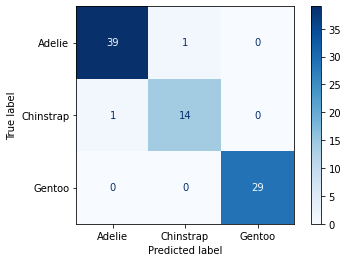

In [19]:
plot_confusion_matrix(tree, X_test, y_test,display_labels=names, cmap=plt.cm.Blues, normalize=None)
plt.show()

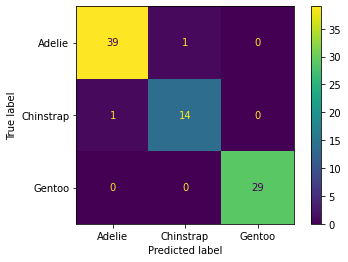

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=names)
disp.plot()
plt.show()